In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from scipy.stats import chi2
%matplotlib inline
import math

from statsmodels.sandbox.stats.multicomp import multipletests

In [2]:
plt.rcParams["figure.figsize"] = (12,6) # set figure size

## Question 1 c

In [3]:
np.random.seed(100)
x = np.array([ 3.23, -2.50,  1.88, -0.68,  4.43, 0.17, 
              1.03, -0.07, -0.01,  0.76,  1.76, 3.18,
              0.33, -0.31,  0.30, -0.61,  1.52, 5.43,
              1.54,  2.28,  0.42,  2.33, -1.03, 4.00,
              0.39   
             ])

n = len(x)
muhat = np.mean(x)
sigmahat = np.std(x)
tauhat = muhat + sigmahat * 1.645
sehat = sigmahat / np.sqrt(n) * np.sqrt(1 + 1.645**2/2)

B = 1000
B_MeanDiff = np.zeros(B)
for i in range(B):
    B_sample_idx = np.random.normal(loc=muhat, scale=sigmahat, size=n)
    B_MeanDiff[i] = np.mean(B_sample_idx) + np.std(B_sample_idx) * 1.645

print("MLE tau hat is", tauhat)
print("SE for delta method is", sehat)
print("SE for bootstrap method is", np.std(B_MeanDiff))

MLE tau hat is 4.180676699756028
SE for delta method is 0.5576086333575547
SE for bootstrap method is 0.5570456865032651


# Problem 3

## 3a

In [4]:
np.random.seed(100)
n = 100
x = np.random.normal(loc=5.0, scale=1.0, size=n)
xbar = np.mean(x)
thetahat = math.exp(xbar)
sehat = thetahat/np.sqrt(n)
B = 1000
B_MeanDiff = np.zeros(B)
B_MeanDiff2 = np.zeros(B)

for i in range(B):
    # nonparametric
    B_sample_idx = np.random.choice(n, size=n,replace = True)
    B_MeanDiff[i] = math.exp(np.mean(x[B_sample_idx]))
    # parameteric
    sample = np.random.normal(loc=xbar, scale=1.0, size=n)
    B_MeanDiff2[i] = math.exp(np.mean(sample))
    

#print(B_MeanDiff)
se = np.sqrt(np.var(B_MeanDiff))
se2 = np.sqrt(np.var(B_MeanDiff2))

se3 = thetahat * (1 / np.sqrt(n))

CI_Percent = list(np.quantile(B_MeanDiff, q=[0.025, 0.975]))
CI_Percent2 = list(np.quantile(B_MeanDiff2, q=[0.025, 0.975]))
CI_Percent3 = [thetahat - 1.96 * se3, thetahat + 1.96 * se3]

print("SE for Nonparametric is", se)
print("SE for parametric is", se2)
print("SE for delta is", se3)
print()

print("CI for Nonparametric is", CI_Percent)
print("CI for parametric is", CI_Percent2)
print("CI for delta is", CI_Percent3)

SE for Nonparametric is 12.514415698128172
SE for parametric is 13.316278592897357
SE for delta is 13.373151172873605

CI for Nonparametric is [110.40017183415343, 158.33347364554834]
CI for parametric is [109.23509763415906, 160.579913195595]
CI for delta is [107.52013542990379, 159.94288802756833]


From result above, we can see that they have similar value for Standard error and Confidence error. Among them, the delta method appears to have the highest standard error value

## 3b

In [5]:
np.random.seed(100)

B = 1000
B_MeanDiff3 = np.zeros(B)

for i in range(B):
    # true
    sample = np.random.normal(loc=5, scale=1.0, size=n)
    B_MeanDiff3[i] = math.exp(np.mean(sample))
    
    
# delta method
B_MeanDiff4 = np.random.normal(loc=thetahat, scale=sehat**2, size=1000)

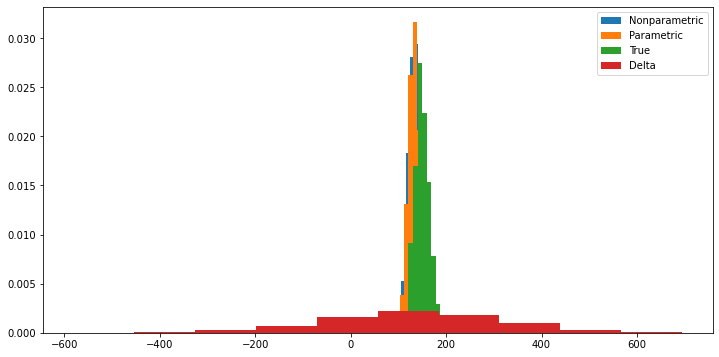

In [6]:
plt.hist(B_MeanDiff, label = 'Nonparametric', density = True)
plt.hist(B_MeanDiff2, label = 'Parametric', density = True)
plt.hist(B_MeanDiff3, label = 'True', density = True)
plt.hist(B_MeanDiff4, label = 'Delta', density = True)
plt.legend()

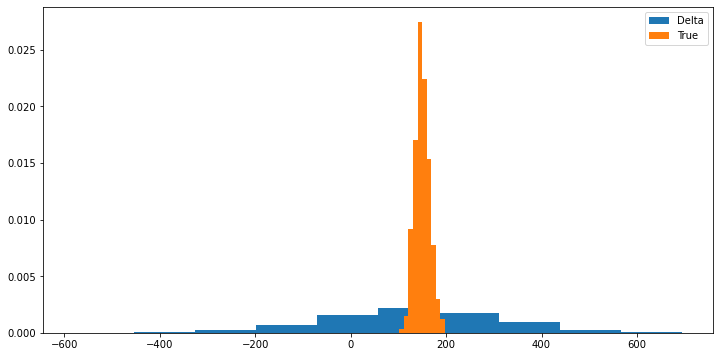

In [7]:
plt.hist(B_MeanDiff4, label = 'Delta', density = True)
plt.hist(B_MeanDiff3, label = 'True', density = True)
#plt.hist(B_MeanDiff2, label = 'Parametric', density = True)
#plt.hist(B_MeanDiff, label = 'Nonparametric', density = True)
plt.legend()

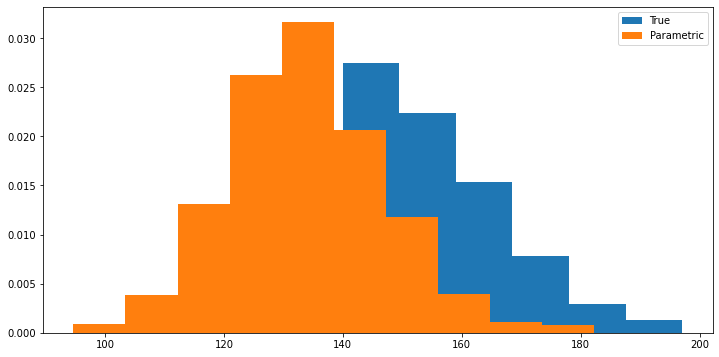

In [8]:
#plt.hist(B_MeanDiff4, label = 'Delta', density = True)
plt.hist(B_MeanDiff3, label = 'True', density = True)
plt.hist(B_MeanDiff2, label = 'Parametric', density = True)
#plt.hist(B_MeanDiff, label = 'Nonparametric', density = True)
plt.legend()

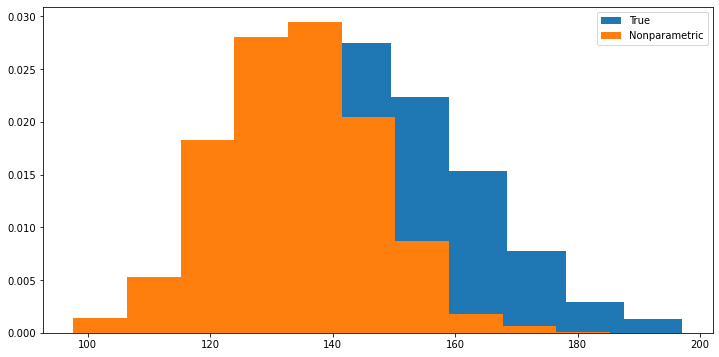

In [9]:
#plt.hist(B_MeanDiff4, label = 'Delta', density = True)
plt.hist(B_MeanDiff3, label = 'True', density = True)
#plt.hist(B_MeanDiff2, label = 'Parametric', density = True)
plt.hist(B_MeanDiff, label = 'Nonparametric', density = True)
plt.legend()

Among the three methods, it appears as if the nonparametric approach is the closest approximation to the true distribution

# Problem 5

## 5b

In [10]:
np.random.seed(100)

lambda0 = 1
n = 20
alpha = 0.05

B = 1000
B_MeanDiff = np.zeros(B)

for i in range(B):
    x = np.random.poisson(lam = lambda0, size=n)
    lambdahat = np.mean(x)
    W = (lambdahat - lambda0) / np.sqrt(lambdahat/n)
    B_MeanDiff[i] = chi2.sf(W**2, df=1)
    
np.mean(B_MeanDiff < 0.05)

0.05

## 5d

In [11]:
np.random.seed(100)

lambda0 = 1.5
n = 20
alpha = 0.05

B = 1000
B_MeanDiff = np.zeros(B)

for i in range(B):
    x = np.random.poisson(lam = lambda0, size=n)
    lambdahat = np.mean(x)
    W = (lambdahat - lambda0) / np.sqrt(lambdahat/n)
    B_MeanDiff[i] = chi2.sf(W**2, df=1)
    
np.mean(B_MeanDiff < 0.05)

0.07